# Предсказание оттока клиентов

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). 

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

### Импорты

In [1734]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1735]:
df = pd.read_csv('telecom_users.csv')
df_1 = df.copy(deep=True)
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [1736]:
df.isnull().sum(), df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


(customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 (5986, 21),
 None)

Пропущенных значений нет.
Числовые данные в трех столбцах: SeniorCitizen, tenure, MonthlyCharges.
SeniorCitizen - категориальные данные, как и другие данные со строковым типом,
tenure - дискретные данные,
MonthlyCharges, TotalCharges - непрерывные.
Столбец TotalCharges содержит непрерывные данные  в формате string. В нескольких строчках пропущенные значения - пробелы. 

In [1737]:
#Ищем индексы строк с пропущенными значениями в столбце TotalCharges, удаляем.
index = []
for i, num in enumerate(df.TotalCharges):
    try:
        float(num)
    except:
        index.append(i)
        print(i)

356
634
2771
3086
3255
4326
5375
5382
5695
5951


In [1738]:
df = df.drop(index=index)
df.TotalCharges  = df.TotalCharges.astype(float) #Переводим в тип float.

#### Меры центральной тенденции и меры разброса

In [1739]:
stat = df.describe()
stat = stat.reset_index()
stat

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,count,5976.000000,5976.000000,5976.000000,5976.000000
1,mean,0.161647,32.523092,64.846687,2298.060617
2,std,0.368157,24.500858,30.107576,2274.127165
3,min,0.000000,1.000000,18.250000,18.800000
4,25%,0.000000,9.000000,35.750000,404.312500
5,50%,0.000000,29.000000,70.425000,1412.150000
6,75%,0.000000,56.000000,89.900000,3846.962500
7,max,1.000000,72.000000,118.750000,8684.800000


In [1740]:
#Считаем размах и межквартильный размах
stat.TotalCharges.loc[7] - stat.TotalCharges.loc[3] # 8666.0
stat.MonthlyCharges.loc[7] - stat.MonthlyCharges.loc[3] #100.5
stat.tenure.loc[7] - stat.tenure.loc[3] #71
stat.TotalCharges.loc[6] - stat.TotalCharges.loc[4] # 3442.65
stat.MonthlyCharges.loc[6] - stat.MonthlyCharges.loc[4] #54.15
stat.tenure.loc[6] - stat.tenure.loc[4] #47

47.0

В столбцах tenure и TotalCharges медиана меньше, чем среднее, - возможно, есть выбросы справа,
в столбце MonthlyCharges - наоборот, выбросы слева. Стоит проверить, построив гистограммы.
SeniorCitizen - категориальный признак.

<AxesSubplot:>

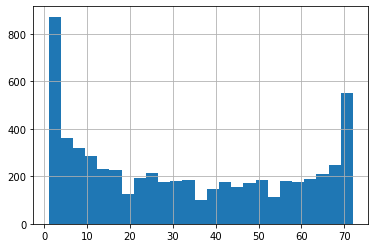

In [1741]:
df.tenure.hist(bins=25)
# Строим гистограмму для значения tenure

In [1742]:
df['tenure_type'] = df.tenure.apply(lambda x: 0 if x < 4 else 1 if x < 69 else 2)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_type
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,2
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,1
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,1
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes,0
5982,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No,1
5983,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No,1
5984,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes,1


Не похоже на выбросы, минимальных и максимальных значений больше, чем остальных. Выделяются группы от нуля до ~8, от ~8 до ~65, от ~65 до ~72.

<AxesSubplot:>

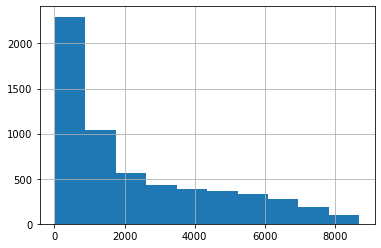

In [1743]:
df.TotalCharges.hist()
#Строим гистограмму для признака TotalCharges

Правосторонняя асимметрия показывает, почему медиана была меньше среднего значения.

<AxesSubplot:>

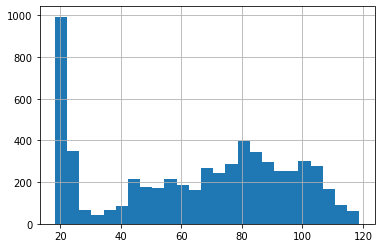

In [1744]:
df.MonthlyCharges.hist(bins=25)
#Строим гистограмму для признака MonthlyCharges

In [1745]:
df['type'] = df.MonthlyCharges.apply(lambda x: 0 if x > 25 else 1 if x < 78 else 2)
#Отделим группу с низкой оплатой за месяц.

<!-- В этом случае значения слева тоже нельзя назвать выбросами, поскольку количественно их много. -->

#### Обработка категориальных данных.

##### gender, Partner, Dependents, PhoneService, PaperlessBilling, SenirCitizen

In [1746]:
df['gender'].value_counts(),\
df['Partner'].value_counts(),\
df['Dependents'].value_counts(),\
df['PhoneService'].value_counts(),\
df['PaperlessBilling'].value_counts(),\
df.SeniorCitizen.value_counts()
#Сбалансированные признаки: gender, Partner.
#Несбалансированные: Dependents, PhoneService, PaperlessBilling, SeniorCitizen.

(Male      3044
 Female    2932
 Name: gender, dtype: int64,
 No     3080
 Yes    2896
 Name: Partner, dtype: int64,
 No     4195
 Yes    1781
 Name: Dependents, dtype: int64,
 Yes    5388
 No      588
 Name: PhoneService, dtype: int64,
 Yes    3525
 No     2451
 Name: PaperlessBilling, dtype: int64,
 0    5010
 1     966
 Name: SeniorCitizen, dtype: int64)

In [1747]:
#Cоберем все социальные характеристики клиента в одну
df['pers_type'] = (df['gender'].map(str) + df['SeniorCitizen'].map(str) + df['Partner'].map(str) + df['Dependents'].map(str))
df['pers_type_int'] = df['pers_type'].astype('category')

In [1748]:

# df['contr_charge'] = df['contr_charge'].astype('category').apply(lambda x: x.cat.codes)

In [1749]:
#Переводим бинарные категориальные данные в числовой формат 1/0.
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category')
df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'Churn', 'PaperlessBilling']] =\
df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'Churn', 'PaperlessBilling']].\
astype('category')

##### MultipleLines, InternetService, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod, OnlineBackup  

In [1750]:
#Смотрим количество значений по различным типам этих значений
df.MultipleLines.value_counts(),\
df.OnlineSecurity.value_counts(),\
df.DeviceProtection.value_counts(),\
df.TechSupport.value_counts(),\
df.StreamingTV.value_counts(),\
df.StreamingMovies.value_counts(),\
df.Contract.value_counts(),\
df.PaymentMethod.value_counts(),\
df.OnlineBackup.value_counts()

(No                  2843
 Yes                 2545
 No phone service     588
 Name: MultipleLines, dtype: int64,
 No                     2982
 Yes                    1709
 No internet service    1285
 Name: OnlineSecurity, dtype: int64,
 No                     2639
 Yes                    2052
 No internet service    1285
 Name: DeviceProtection, dtype: int64,
 No                     2959
 Yes                    1732
 No internet service    1285
 Name: TechSupport, dtype: int64,
 No                     2388
 Yes                    2303
 No internet service    1285
 Name: StreamingTV, dtype: int64,
 No                     2353
 Yes                    2338
 No internet service    1285
 Name: StreamingMovies, dtype: int64,
 Month-to-month    3269
 Two year          1432
 One year          1275
 Name: Contract, dtype: int64,
 Electronic check             2006
 Mailed check                 1362
 Bank transfer (automatic)    1306
 Credit card (automatic)      1302
 Name: PaymentMethod, dtyp

Частично сбалансированные признаки (два признака из трех): MultipleLines, TechSupport, StreamingTV, Contract.
Контрактов на месяц значительно больше, чем на год и на два.
No internet service - значение, общее для пользователей услугами OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, OnlineBackup.  

In [1753]:
#Выражаем остальные категориальные данные через числа 0/1/2/3.
df[['MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport',\
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'OnlineBackup']]\
= df[['MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport',\
      'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'OnlineBackup']].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_type,type,pers_type,pers_type_int
0,7010-BRBUU,1,0,1,1,72,1,2,2,1,...,2,0,1,24.10,1734.65,0,2,1,Male0YesYes,11
1,9688-YGXVR,0,0,0,0,44,1,0,1,0,...,0,1,1,88.15,3973.20,0,1,0,Female0NoNo,0
2,9286-DOJGF,0,1,1,0,38,1,2,1,0,...,0,1,0,74.95,2869.85,1,1,0,Female1YesNo,6
3,6994-KERXL,1,0,0,0,4,1,0,0,0,...,0,1,2,55.90,238.50,0,1,0,Male0NoNo,8
4,2181-UAESM,1,0,0,0,2,1,0,0,2,...,0,0,2,53.45,119.50,0,0,0,Male0NoNo,8


#### Целевая переменная

In [1754]:
df.Churn.value_counts()
#Несбалансированная выборка.

0    4389
1    1587
Name: Churn, dtype: int64

# 2. Исследование зависимостей и формулирование гипотез

#### Таблица корреляции

In [1755]:
corr = df.corr()
corr[np.abs(corr) < 0.3] = 0 #Убираем случаи слабой корреляции.
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_type,type,pers_type_int
gender,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.904182
SeniorCitizen,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308778
Partner,0.000000,0.000000,1.000000,0.448684,0.384269,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.322968,0.000000,0.326719,0.000000,0.000000
Dependents,0.000000,0.000000,0.448684,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tenure,0.000000,0.000000,0.384269,0.000000,1.000000,0.000000,0.350918,0.000000,0.330431,0.368590,...,0.307526,0.677012,0.000000,-0.359394,0.000000,0.827439,-0.350420,0.700079,0.000000,0.000000
PhoneService,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.389718,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MultipleLines,0.000000,0.000000,0.000000,0.000000,0.350918,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.437254,0.459270,0.000000,0.000000,-0.345146,0.000000
InternetService,0.000000,0.000000,0.000000,0.000000,0.000000,0.389718,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.318930,0.000000,0.000000,0.000000,0.722641,0.000000
OnlineSecurity,0.000000,0.000000,0.000000,0.000000,0.330431,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.373197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OnlineBackup,0.000000,0.000000,0.000000,0.000000,0.368590,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.373436,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

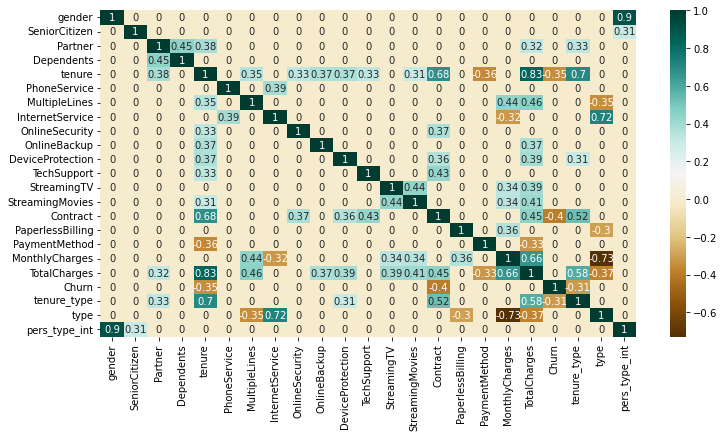

In [1756]:
df_hm = df.drop(['customerID'], axis=1)
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='BrBG')

- Отметим сильную корреляцию TotalCharges и tenure; все-таки значение 0.83 не позволяет выкинуть один из признаков - наоборот, их значимость повышается, поскольку задача - удержать клиентов, уменьшить отток.
- Есть блок признаков, связанных с интернет-сервисом, которые имеют похожие модули значений корреляции. 
- Вполне логична отрицательная корреляция услуг, связанных с интернет-сервисом, и ежемесячной оплаты. Хотя, казалось, что корреляция должна быть больше проявлена.
- Есть также небольшая корреляция типов контракта (Contract) и длительностью (tenure) пользования услугами.
- Сильных зависимостей таргета от какого-нибудь признака нет, чуть более проявлены отрицательные корреляции tenure-Churn, Contract-Churn. 

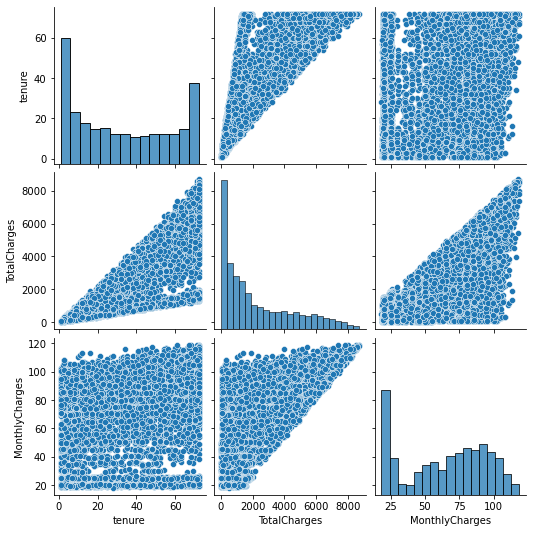

In [1757]:
sns.pairplot(df[['tenure', 'TotalCharges', 'MonthlyCharges']])

#### Есть ли связь между размером оплаты за месяц (MonthlyCharges) и длительностью пользования услугами (tenure)?
#### Одинаковое ли количество человек в месяц пользуется услугами телекоммуникационной компании? Как зависит количество клиентов (count(customerID)) от длительности (tenure)?

In [1758]:
#Делаем группировку по длительности пользования услугами (tenure),
#считаем медианные значения оплаты в месяц (MonthlyCharges) и в год (TotalCharges),
#сортируем по количеству клиентов.
df.groupby('tenure', as_index=False).agg({'customerID': 'count',\
                                          'MonthlyCharges': 'median',\
                                          'TotalCharges': 'median'})\
.sort_values('customerID', ascending=False).head(10)

,tenure,customerID,MonthlyCharges,TotalCharges
0,1,510,49.900,49.900
71,72,308,89.725,6465.875
1,2,194,55.925,114.400
2,3,169,64.400,191.350
3,4,154,55.400,228.450
70,71,152,83.750,5984.575
4,5,111,69.350,331.900
6,7,111,69.200,472.650
7,8,110,59.625,485.000
9,10,102,61.600,623.225


- Мода по признаку tenure = 1.
- Интересно заметить разницу между количеством тех, кто воспользовался услугами в первый месяц, и тех, кто продолжил пользоваться услугами.
- Максимальные значения количества пользователей в первый месяц, возможно, говорят о том, что входное предложение привлекательное, но эти услуги связи подходят не всем пользователям. Кроме того, раньше эти услуги связи, возможно, были привлекательнее для клиентов.
- Если сделать сортировку по TotalCharges, то можно наблюдать очевидную корреляцию между длительностью использования услуг и общей суммой оплаты.
- Возможно, клиенты, которые с компанией дольше, платят больше. Это стоит проверить.

#### Клиенты, которые с компанией дольше, платят больше?

In [1759]:
df.groupby('tenure', as_index=False).agg({'customerID':'count', 'MonthlyCharges': 'median'}).sort_values('tenure').head(20)

,tenure,customerID,MonthlyCharges
0,1,510,49.900
1,2,194,55.925
2,3,169,64.400
3,4,154,55.400
4,5,111,69.350
5,6,98,54.925
6,7,111,69.200
7,8,110,59.625
8,9,97,72.900
9,10,102,61.600


In [1760]:
df.groupby('tenure', as_index=False).agg({'customerID':'count', 'MonthlyCharges': 'median'}).sort_values('tenure').tail(20)


,tenure,customerID,MonthlyCharges
52,53,57,74.100
53,54,55,82.450
54,55,55,73.100
55,56,68,83.700
56,57,59,71.100
57,58,61,75.800
58,59,52,76.600
59,60,65,79.200
60,61,60,81.600
61,62,66,82.950


Оплата со второго месяца в пределах 50-70, то есть не растет, но заметно, что люди, давно пользующиеся услугами (50-70 месяцев), платят от 70 до 90 условных единиц. Проверим это через диаграмму рассеяния.

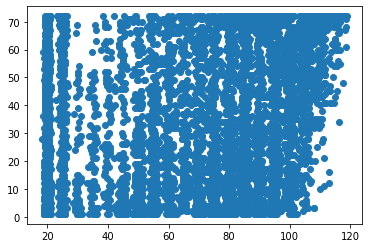

In [1761]:
plt.scatter(df['MonthlyCharges'], df['tenure'])

Линейной связи признаков 'MonthlyCharges', 'tenure' нет. 
Отметим, что на низкую оплату (18-25 у.ед.) всегда есть спрос и у "старых" пользователей, и у новых.  
Особо плотные значения от 45 до 110 условных единиц. 

In [1764]:
df['tenure_charge'] = (df['type'].map(str)+df['tenure_type'].map(str)).astype('category') #Добавление значимого признака: связь размера месячной оплаты и продолжительности.
df['contr_charge'] = (df['type'].map(str)+df['Contract'].map(str)).astype('category') #Добавление значимого признака: связь типа контракта и оплаты. 

#### Есть ли связь социальных характеристик и готовностью платить определенную сумму за услуги?

In [1765]:
df.groupby(['pers_type', 'pers_type_int']).agg({'customerID':'count', 'MonthlyCharges': ['min', 'max', 'median']})

customerID MonthlyCharges                 
                                 count            min     max   median
pers_type     pers_type_int                                           
Female0NoNo   0                   1111          18.70  118.65   64.900
Female0NoYes  1                    122          19.45  116.15   54.625
Female0YesNo  2                    513          18.40  118.60   78.850
Female0YesYes 3                    704          18.80  118.75   59.625
Female1NoNo   4                    264          19.50  117.35   80.575
Female1NoYes  5                      3          71.00  105.35  101.300
Female1YesNo  6                    182          19.60  117.45   90.775
Female1YesYes 7                     33          29.30  110.60   88.450
Male0NoNo     8                   1191          18.25  118.35   60.650
Male0NoYes    9                    175          19.10  114.60   48.650
Male0YesNo    10                   487          18.80  117.80   80.250
Male0YesYes   11                   707          18.80  116.60   64.750
Male1NoNo     12                   209          19.20  116.50   78.500
Male1NoYes    13                     5          45.75   94.80   54.550
Male1YesNo    14                   238          19.35  116.05   86.600
Male1YesYes   15                    32          19.50  116.25   91.550

Клиенты телекоммуникационной компании в основном свободные бездетные женщины и мужчины не пенсионного возраста. Меньше всего мужчин-пенсионеров не в браке, но с иждивенцами, а также женщин-пенсионерок не в браке, но с иждивенцами.
Больше всего за услуги в месяц в среднем платят женщины-пенсионерки не в браке, но с иждивенцами (всего три человека в выборке), женщины-пенсионерки в браке и с иждивенцами, мужчины-пенсионеры в браке и с иждивенцами.


#### Есть ли связь между наличием партнеров и иждивенцев у клиента с использованием интернет-сервисов

In [1766]:
df.groupby(['Partner', 'StreamingTV']).agg('count')

customerID  gender  SeniorCitizen  Dependents  tenure  \
Partner StreamingTV                                                          
0       0                  1421    1421           1421        1421    1421   
        1                   661     661            661         661     661   
        2                   998     998            998         998     998   
1       0                   967     967            967         967     967   
        1                   624     624            624         624     624   
        2                  1305    1305           1305        1305    1305   

                     PhoneService  MultipleLines  InternetService  \
Partner StreamingTV                                                 
0       0                    1421           1421             1421   
        1                     661            661              661   
        2                     998            998              998   
1       0                     967            967              967   
        1                     624            624              624   
        2                    1305           1305             1305   

                     OnlineSecurity  OnlineBackup  ...  PaymentMethod  \
Partner StreamingTV                                ...                  
0       0                      1421          1421  ...           1421   
        1                       661           661  ...            661   
        2                       998           998  ...            998   
1       0                       967           967  ...            967   
        1                       624           624  ...            624   
        2                      1305          1305  ...           1305   

                     MonthlyCharges  TotalCharges  Churn  tenure_type  type  \
Partner StreamingTV                                                           
0       0                      1421          1421   1421         1421  1421   
        1                       661           661    661          661   661   
        2                       998           998    998          998   998   
1       0                       967           967    967          967   967   
        1                       624           624    624          624   624   
        2                      1305          1305   1305         1305  1305   

                     pers_type  pers_type_int  tenure_charge  contr_charge  
Partner StreamingTV                                                         
0       0                 1421           1421           1421          1421  
        1                  661            661            661           661  
        2                  998            998            998           998  
1       0                  967            967            967           967  
        1                  624            624            624           624  
        2                 1305           1305           1305          1305  

[6 rows x 25 columns]

In [1767]:
df.groupby(['Dependents', 'StreamingTV']).agg('count')

customerID  gender  SeniorCitizen  Partner  tenure  \
Dependents StreamingTV                                                       
0          0                  1811    1811           1811     1811    1811   
           1                   743     743            743      743     743   
           2                  1641    1641           1641     1641    1641   
1          0                   577     577            577      577     577   
           1                   542     542            542      542     542   
           2                   662     662            662      662     662   

                        PhoneService  MultipleLines  InternetService  \
Dependents StreamingTV                                                 
0          0                    1811           1811             1811   
           1                     743            743              743   
           2                    1641           1641             1641   
1          0                     577            577              577   
           1                     542            542              542   
           2                     662            662              662   

                        OnlineSecurity  OnlineBackup  ...  PaymentMethod  \
Dependents StreamingTV                                ...                  
0          0                      1811          1811  ...           1811   
           1                       743           743  ...            743   
           2                      1641          1641  ...           1641   
1          0                       577           577  ...            577   
           1                       542           542  ...            542   
           2                       662           662  ...            662   

                        MonthlyCharges  TotalCharges  Churn  tenure_type  \
Dependents StreamingTV                                                     
0          0                      1811          1811   1811         1811   
           1                       743           743    743          743   
           2                      1641          1641   1641         1641   
1          0                       577           577    577          577   
           1                       542           542    542          542   
           2                       662           662    662          662   

                        type  pers_type  pers_type_int  tenure_charge  \
Dependents StreamingTV                                                  
0          0            1811       1811           1811           1811   
           1             743        743            743            743   
           2            1641       1641           1641           1641   
1          0             577        577            577            577   
           1             542        542            542            542   
           2             662        662            662            662   

                        contr_charge  
Dependents StreamingTV                
0          0                    1811  
           1                     743  
           2                    1641  
1          0                     577  
           1                     542  
           2                     662  

[6 rows x 25 columns]

In [1768]:
df.groupby(['Partner', 'StreamingMovies']).agg('count')

customerID  gender  SeniorCitizen  Dependents  \
Partner StreamingMovies                                                  
0       0                      1391    1391           1391        1391   
        1                       661     661            661         661   
        2                      1028    1028           1028        1028   
1       0                       962     962            962         962   
        1                       624     624            624         624   
        2                      1310    1310           1310        1310   

                         tenure  PhoneService  MultipleLines  InternetService  \
Partner StreamingMovies                                                         
0       0                  1391          1391           1391             1391   
        1                   661           661            661              661   
        2                  1028          1028           1028             1028   
1       0                   962           962            962              962   
        1                   624           624            624              624   
        2                  1310          1310           1310             1310   

                         OnlineSecurity  OnlineBackup  ...  PaymentMethod  \
Partner StreamingMovies                                ...                  
0       0                          1391          1391  ...           1391   
        1                           661           661  ...            661   
        2                          1028          1028  ...           1028   
1       0                           962           962  ...            962   
        1                           624           624  ...            624   
        2                          1310          1310  ...           1310   

                         MonthlyCharges  TotalCharges  Churn  tenure_type  \
Partner StreamingMovies                                                     
0       0                          1391          1391   1391         1391   
        1                           661           661    661          661   
        2                          1028          1028   1028         1028   
1       0                           962           962    962          962   
        1                           624           624    624          624   
        2                          1310          1310   1310         1310   

                         type  pers_type  pers_type_int  tenure_charge  \
Partner StreamingMovies                                                  
0       0                1391       1391           1391           1391   
        1                 661        661            661            661   
        2                1028       1028           1028           1028   
1       0                 962        962            962            962   
        1                 624        624            624            624   
        2                1310       1310           1310           1310   

                         contr_charge  
Partner StreamingMovies                
0       0                        1391  
        1                         661  
        2                        1028  
1       0                         962  
        1                         624  
        2                        1310  

[6 rows x 25 columns]

In [1769]:
df.groupby(['Dependents', 'StreamingMovies']).agg('count')

customerID  gender  SeniorCitizen  Partner  \
Dependents StreamingMovies                                               
0          0                      1761    1761           1761     1761   
           1                       743     743            743      743   
           2                      1691    1691           1691     1691   
1          0                       592     592            592      592   
           1                       542     542            542      542   
           2                       647     647            647      647   

                            tenure  PhoneService  MultipleLines  \
Dependents StreamingMovies                                        
0          0                  1761          1761           1761   
           1                   743           743            743   
           2                  1691          1691           1691   
1          0                   592           592            592   
           1                   542           542            542   
           2                   647           647            647   

                            InternetService  OnlineSecurity  OnlineBackup  \
Dependents StreamingMovies                                                  
0          0                           1761            1761          1761   
           1                            743             743           743   
           2                           1691            1691          1691   
1          0                            592             592           592   
           1                            542             542           542   
           2                            647             647           647   

                            ...  PaymentMethod  MonthlyCharges  TotalCharges  \
Dependents StreamingMovies  ...                                                
0          0                ...           1761            1761          1761   
           1                ...            743             743           743   
           2                ...           1691            1691          1691   
1          0                ...            592             592           592   
           1                ...            542             542           542   
           2                ...            647             647           647   

                            Churn  tenure_type  type  pers_type  \
Dependents StreamingMovies                                        
0          0                 1761         1761  1761       1761   
           1                  743          743   743        743   
           2                 1691         1691  1691       1691   
1          0                  592          592   592        592   
           1                  542          542   542        542   
           2                  647          647   647        647   

                            pers_type_int  tenure_charge  contr_charge  
Dependents StreamingMovies                                              
0          0                         1761           1761          1761  
           1                          743            743           743  
           2                         1691           1691          1691  
1          0                          592            592           592  
           1                          542            542           542  
           2                          647            647           647  

[6 rows x 25 columns]

Люди в браке и с иждивенцами чаще подключают стриминговое ТВ и стриминговые фильмы.

In [1770]:
df[(df['tenure'] > 20) & (df['StreamingTV'] == 1)\
   & (df['StreamingMovies'] == 1) & (df['InternetService'] == 1)] #874, то есть 25%
df[df['tenure'] > 20] #3553
df[(df['tenure'] > 50) & (df['StreamingTV'] == 1)\
   & (df['StreamingMovies'] == 1) & (df['InternetService'] == 1)] #520, то есть 29%
df[df['tenure'] > 50] #1792
df[(df['tenure'] > 60) & (df['StreamingTV'] == 1)\
   & (df['StreamingMovies'] == 1) & (df['InternetService'] == 1)] #368, то есть 31%
df[df['tenure'] > 60] #1195

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_type,type,pers_type,pers_type_int,tenure_charge,contr_charge
0,7010-BRBUU,1,0,1,1,72,1,2,2,1,...,1,24.10,1734.65,0,2,1,Male0YesYes,11,12,12
5,4312-GVYNH,0,0,1,0,70,0,1,0,2,...,0,49.85,3370.20,0,2,0,Female0YesNo,2,02,02
17,5115-SQAAU,0,0,1,1,69,1,2,2,1,...,0,25.60,1673.40,0,2,0,Female0YesYes,3,02,02
21,4683-WYDOU,1,0,1,0,62,1,2,1,0,...,0,107.60,6912.70,0,1,0,Male0YesNo,10,01,02
22,1166-PQLGG,0,0,1,1,72,1,0,2,1,...,0,19.55,1463.45,0,2,1,Female0YesYes,3,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,2834-JRTUA,1,0,0,0,71,1,2,1,2,...,2,108.05,7532.15,1,2,0,Male0NoNo,8,02,02
5954,0902-XKXPN,1,0,1,1,69,1,0,2,1,...,0,20.20,1376.50,0,2,1,Male0YesYes,11,12,12
5956,6211-WWLTF,1,0,1,0,63,1,0,1,2,...,1,99.70,6330.40,0,1,0,Male0YesNo,10,01,02
5977,9076-AXYIK,1,1,1,0,64,1,2,1,0,...,2,102.10,6538.45,0,1,0,Male1YesNo,14,01,02


##### Как связаны признаки Contract и tenure?

In [1771]:
df.groupby('Contract').agg({'tenure': ['median', 'mean', 'max', 'min']}) #Часто более длительные контракты заключают более давние клиенты.
a = df.groupby(['tenure', 'Contract'], as_index=False).agg('count').sort_values('tenure', ascending=False)

Text(0, 0.5, 'Количество человек')

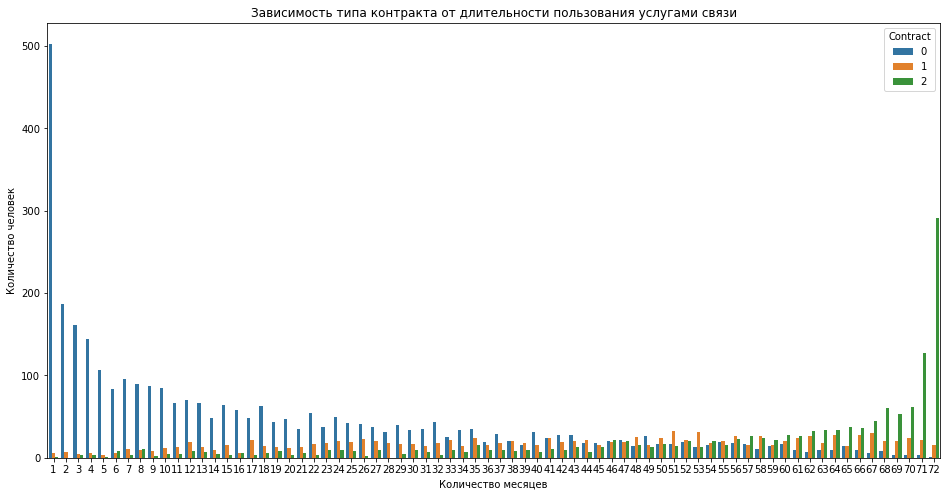

In [1772]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(data=a, x='tenure', y='customerID', hue='Contract')
ax.set_title('Зависимость типа контракта от длительности пользования услугами связи')
ax.set_xlabel('Количество месяцев')
ax.set_ylabel('Количество человек')
#Примечание
#Типы контрактов: 0 - один месяц, 1 - один год, 2 - два года.

Вывод: с 1-го по 49 месяц превалируют месячные контракты, более "старые" клиенты отдают предпочтение двухгодичным и годовым контрактам.

In [1773]:
df['ten_type'] = df['tenure'].apply(lambda x: 1 if x > 1 and x <= 49 else 0)
df['contr_tenure'] = (df['ten_type'].map(str)+df['Contract'].map(str)).astype('category') #Добавляем значимый признак

#### Связь целевой переменной с социальными характеристика клиентов

In [1774]:
df_churn = df.groupby(['pers_type', 'pers_type_int', 'Churn']).\
agg('count')['customerID'].reset_index() #Делаем группировку по типам клиентов и целевой переменной, считаем количество клиентов.

In [1775]:
df_churn

,pers_type,pers_type_int,Churn,customerID
0,Female0NoNo,0,0,758
1,Female0NoNo,0,1,353
2,Female0NoYes,1,0,94
3,Female0NoYes,1,1,28
4,Female0YesNo,2,0,414
5,Female0YesNo,2,1,99
6,Female0YesYes,3,0,599
7,Female0YesYes,3,1,105
8,Female1NoNo,4,0,131
9,Female1NoNo,4,1,133


In [1776]:
df_new_new = df_churn[['pers_type', 'customerID']].groupby('pers_type', as_index=False).agg('sum') #Считаем общее количество клиентов
df_new_new.rename(columns={'customerID': 'summa'}, inplace=True)
df_churn = df_churn.merge(df_new_new) #Добавляем столбец с общим количеством клиентов по типам.

In [1777]:
df_churn['share'] = round((df_churn['customerID'] / df_churn['summa'])*100) #Считаем процент оттока среди клиентов одного типа
df_churn[df_churn['Churn'] == 1].sort_values('share', ascending=False) #Выбираем только те случаи, когда клиенты перестали пользоваться услугами компании, сортируем процент оттока по убыванию

,pers_type,pers_type_int,Churn,customerID,summa,share
9,Female1NoNo,4,1,133,264,50.0
25,Male1NoNo,12,1,99,209,47.0
29,Male1YesNo,14,1,87,238,37.0
13,Female1YesNo,6,1,65,182,36.0
11,Female1NoYes,5,1,1,3,33.0
1,Female0NoNo,0,1,353,1111,32.0
17,Male0NoNo,8,1,360,1191,30.0
31,Male1YesYes,15,1,9,32,28.0
3,Female0NoYes,1,1,28,122,23.0
21,Male0YesNo,10,1,110,487,23.0


In [1778]:
#Добавляем значимый признак
df['ch_pers'] = df['pers_type_int'].apply(lambda x: 1 if x == 4  or x == 12 else 0).astype('category')

Большой процент оттока среди клиентов обоего пола, находящихся на пенсии, не состоящих в браке и без иждивенцев. В количественном отношении также нельзя не отметить значительный отток мужчин и женщин из самой большой группы, то есть тех, кто не состоит в браке и не имеет детей.

##### Есть ли связь оттока и типа контрактов?

In [1779]:
df_cch = df.groupby(['contr_tenure', 'Churn']).agg('count').reset_index() #Группируем по созданному признаку
df_cch[df_cch['Churn'] == 1].sort_values('customerID', ascending=False)
df_new_cch = df.groupby('contr_tenure').agg('count').reset_index()
df_new_cch = df_new_cch.rename(columns={'customerID': 'summa'})
df_cch = df_cch.merge(df_new_cch, on='contr_tenure')
df_cch['share'] = round((df_cch['customerID'] / df_cch['summa'])*100) #Ищем доли ушедших и оставшихся клиентов
df_cch = df_cch[['contr_tenure', 'Churn_x', 'share']]
df_cch[df_cch['Churn_x'] == 1].sort_values('share', ascending=False).head(15) #Сложная интерпретация: 00 - контракт на месяц, клиенты вплоть до 49 месяца, 10 - контракт на год, клиенты до 49 месяца.
#Возьмем признак Contract

,contr_tenure,Churn_x,share
1,00,1,50.0
7,10,1,40.0
3,01,1,13.0
9,11,1,10.0
5,02,1,3.0
11,12,1,2.0


In [1780]:
df_contract = df.groupby(['Contract', 'Churn']).agg('count').reset_index()
df_c = df.groupby('Contract').agg('count').reset_index()
df_c = df_c.rename(columns={'customerID': 'summa'})
df_contract = df_contract.merge(df_c, on='Contract')
df_contract['share'] = round((df_contract['customerID'] / df_contract['summa'])*100)
df_contract = df_contract[['Contract', 'Churn_x', 'share']]
df_contract[df_contract['Churn_x'] == 1]

,Contract,Churn_x,share
1,0,1,43.0
3,1,1,12.0
5,2,1,3.0


Итак, у клиентов, которые заключают контракт на месяц и пользуются услугами компании меньше 49 месяцев, доля оттока - 50 %. У клиентов, которые с компанией также меньше 49 месяецев, но с контрактом на год, доля оттока - 40%.
На второй таблице мы видим, что 40% тех, кто заключил контракт на месяц, в итоге перестали пользоваться услугами компании.

In [1781]:
df['contr_ch'] = df['Contract'].apply(lambda x: 1 if x == 0 else 0).astype('category') #Добавляем значимый признак

#### Есть ли связь между оттоком клиентов и использованием услуг телефонной связи и интернет-сервисов? Возможно, клиентам не нравится качество предоставляемых услуг?

In [1782]:
df.groupby(['PhoneService', 'Churn']).agg('count')

customerID  gender  SeniorCitizen  Partner  Dependents  \
PhoneService Churn                                                           
0            0             439     439            439      439         439   
             1             149     149            149      149         149   
1            0            3950    3950           3950     3950        3950   
             1            1438    1438           1438     1438        1438   

                    tenure  MultipleLines  InternetService  OnlineSecurity  \
PhoneService Churn                                                           
0            0         439            439              439             439   
             1         149            149              149             149   
1            0        3950           3950             3950            3950   
             1        1438           1438             1438            1438   

                    OnlineBackup  ...  tenure_type  type  pers_type  \
PhoneService Churn                ...                                 
0            0               439  ...          439   439        439   
             1               149  ...          149   149        149   
1            0              3950  ...         3950  3950       3950   
             1              1438  ...         1438  1438       1438   

                    pers_type_int  tenure_charge  contr_charge  ten_type  \
PhoneService Churn                                                         
0            0                439            439           439       439   
             1                149            149           149       149   
1            0               3950           3950          3950      3950   
             1               1438           1438          1438      1438   

                    contr_tenure  ch_pers  contr_ch  
PhoneService Churn                                   
0            0               439      439       439  
             1               149      149       149  
1            0              3950     3950      3950  
             1              1438     1438      1438  

[4 rows x 29 columns]

Отток у людей, не подключенных к телефонной связи, - 25%, у подключенных - 27%. Различия незначительны.


In [1783]:
df.groupby(['StreamingTV', 'Churn']).agg('count') 

customerID  gender  SeniorCitizen  Partner  Dependents  \
StreamingTV Churn                                                           
0           0            1589    1589           1589     1589        1589   
            1             799     799            799      799         799   
1           0            1186    1186           1186     1186        1186   
            1              99      99             99       99          99   
2           0            1614    1614           1614     1614        1614   
            1             689     689            689      689         689   

                   tenure  PhoneService  MultipleLines  InternetService  \
StreamingTV Churn                                                         
0           0        1589          1589           1589             1589   
            1         799           799            799              799   
1           0        1186          1186           1186             1186   
            1          99            99             99               99   
2           0        1614          1614           1614             1614   
            1         689           689            689              689   

                   OnlineSecurity  ...  tenure_type  type  pers_type  \
StreamingTV Churn                  ...                                 
0           0                1589  ...         1589  1589       1589   
            1                 799  ...          799   799        799   
1           0                1186  ...         1186  1186       1186   
            1                  99  ...           99    99         99   
2           0                1614  ...         1614  1614       1614   
            1                 689  ...          689   689        689   

                   pers_type_int  tenure_charge  contr_charge  ten_type  \
StreamingTV Churn                                                         
0           0               1589           1589          1589      1589   
            1                799            799           799       799   
1           0               1186           1186          1186      1186   
            1                 99             99            99        99   
2           0               1614           1614          1614      1614   
            1                689            689           689       689   

                   contr_tenure  ch_pers  contr_ch  
StreamingTV Churn                                   
0           0              1589     1589      1589  
            1               799      799       799  
1           0              1186     1186      1186  
            1                99       99        99  
2           0              1614     1614      1614  
            1               689      689       689  

[6 rows x 29 columns]

In [1784]:
df.groupby(['InternetService', 'Churn']).agg('count') 

customerID  gender  SeniorCitizen  Partner  Dependents  \
InternetService Churn                                                           
0               0            1667    1667           1667     1667        1667   
                1             397     397            397      397         397   
1               0            1536    1536           1536     1536        1536   
                1            1091    1091           1091     1091        1091   
2               0            1186    1186           1186     1186        1186   
                1              99      99             99       99          99   

                       tenure  PhoneService  MultipleLines  OnlineSecurity  \
InternetService Churn                                                        
0               0        1667          1667           1667            1667   
                1         397           397            397             397   
1               0        1536          1536           1536            1536   
                1        1091          1091           1091            1091   
2               0        1186          1186           1186            1186   
                1          99            99             99              99   

                       OnlineBackup  ...  tenure_type  type  pers_type  \
InternetService Churn                ...                                 
0               0              1667  ...         1667  1667       1667   
                1               397  ...          397   397        397   
1               0              1536  ...         1536  1536       1536   
                1              1091  ...         1091  1091       1091   
2               0              1186  ...         1186  1186       1186   
                1                99  ...           99    99         99   

                       pers_type_int  tenure_charge  contr_charge  ten_type  \
InternetService Churn                                                         
0               0               1667           1667          1667      1667   
                1                397            397           397       397   
1               0               1536           1536          1536      1536   
                1               1091           1091          1091      1091   
2               0               1186           1186          1186      1186   
                1                 99             99            99        99   

                       contr_tenure  ch_pers  contr_ch  
InternetService Churn                                   
0               0              1667     1667      1667  
                1               397      397       397  
1               0              1536     1536      1536  
                1              1091     1091      1091  
2               0              1186     1186      1186  
                1                99       99        99  

[6 rows x 29 columns]

In [1785]:
df['int_ch'] = df['InternetService'].apply(lambda x: 1 if x == 1 else 0).astype('category') #Добавляем значимый признак


Видно, что большой отток клиентов с интернет-сервисами через FiberOptic.

In [1786]:
df.groupby(['StreamingMovies', 'Churn']).agg('count')

customerID  gender  SeniorCitizen  Partner  Dependents  \
StreamingMovies Churn                                                           
0               0            1561    1561           1561     1561        1561   
                1             792     792            792      792         792   
1               0            1186    1186           1186     1186        1186   
                1              99      99             99       99          99   
2               0            1642    1642           1642     1642        1642   
                1             696     696            696      696         696   

                       tenure  PhoneService  MultipleLines  InternetService  \
StreamingMovies Churn                                                         
0               0        1561          1561           1561             1561   
                1         792           792            792              792   
1               0        1186          1186           1186             1186   
                1          99            99             99               99   
2               0        1642          1642           1642             1642   
                1         696           696            696              696   

                       OnlineSecurity  ...  type  pers_type  pers_type_int  \
StreamingMovies Churn                  ...                                   
0               0                1561  ...  1561       1561           1561   
                1                 792  ...   792        792            792   
1               0                1186  ...  1186       1186           1186   
                1                  99  ...    99         99             99   
2               0                1642  ...  1642       1642           1642   
                1                 696  ...   696        696            696   

                       tenure_charge  contr_charge  ten_type  contr_tenure  \
StreamingMovies Churn                                                        
0               0               1561          1561      1561          1561   
                1                792           792       792           792   
1               0               1186          1186      1186          1186   
                1                 99            99        99            99   
2               0               1642          1642      1642          1642   
                1                696           696       696           696   

                       ch_pers  contr_ch  int_ch  
StreamingMovies Churn                             
0               0         1561      1561    1561  
                1          792       792     792  
1               0         1186      1186    1186  
                1           99        99      99  
2               0         1642      1642    1642  
                1          696       696     696  

[6 rows x 30 columns]

24% - отток среди тех, кто не пользовался стриминговым ТВ, 30% - у тех, кто пользовался. Похожие соотношения и со стриминговыми фильмами: 23% и 30% соответственно. Различия тоже кажутся несущественными.


# 3. Построение моделей для прогнозирования оттока

In [1787]:
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [1788]:
# ### YOUR CODE HERE ###
target = df['Churn']
df = df.drop(['Churn'], axis=1)
df = df.drop(['customerID'], axis=1) #Удаляем уникальный номер клиента, поскольку от его значений результат не может зависеть.
df = df.drop(['pers_type'], axis=1)


In [1789]:
x_train, x_test, y_train, y_test = train_test_split(df, target, random_state=17) #Делим на трэйн и тест.

In [1790]:
sc = StandardScaler() #Масштабируем данные, используя стандартизацию
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Создание и обучение моделей
Параметры подбирались через Гридсерч с пятикратной валидацией.

In [1791]:
gbc_grid = GradientBoostingClassifier(random_state=17, learning_rate=0.1) #GradientBoostingClassifier
gbc_grid.fit(x_train, y_train)
gbc_grid_pred = gbc_grid.predict(x_test)
gbc_proba = gbc_grid.predict_proba(x_test)

In [1792]:
xgb_grid = XGBClassifier(random_state=17, eta=0.1, min_child_weight=7, n_estimators=60, subsample=0.6)
xgb_grid.fit(x_train, y_train) #XGBoosting
xgb_grid_pred = xgb_grid.predict(x_test)
xgb_proba = xgb_grid.predict_proba(x_test)

In [1793]:
nb = GaussianNB() #Наивный Байес
nb_model = nb.fit(x_train, y_train)
nb_preds = nb.predict(x_test)
nb_proba = nb.predict_proba(x_test)

In [1794]:
estimators = [('lr', LogisticRegression(random_state=17, class_weight='balanced', max_iter=500, solver='saga')),
             ('gnb', GaussianNB()),
             ('rf', RandomForestClassifier(random_state=17))]
clf = StackingClassifier(estimators=estimators, #Стекинг
                         final_estimator= GradientBoostingClassifier(random_state=17,
                                                                     learning_rate=0.1))
clf.fit(x_train, y_train) 
stack_preds = clf.predict(x_test)
stack_proba = clf.predict_proba(x_test)

In [1795]:
rfc_grid =RandomForestClassifier(random_state=17, #Случайный лес
                                 bootstrap=True,
                                 max_depth = 8,
                                 min_samples_leaf=2,
                                 n_estimators=150)
rfc_grid.fit(x_train, y_train)
rfc_predicted = rfc_grid.predict(x_test)
rfc_proba = rfc_grid.predict_proba(x_test)

In [1796]:
lr_grid = LogisticRegression(random_state=17, #Логистическая регрессия
                             C=0.5,
                             class_weight='balanced',
                             max_iter=500,
                             solver='saga')
pca = PCA(n_components=25).fit(x_train) #Сокращение размерности
x_train_lr = pca.transform(x_train)
x_test_lr = pca.transform(x_test)

lr_grid.fit(x_train_lr, y_train)
lr_predicted = lr_grid.predict(x_test_lr)
lr_proba = lr_grid.predict_proba(x_test_lr)

In [1797]:
pipeline = make_pipeline(LogisticRegression(random_state=17, C=0.5, class_weight='balanced', max_iter=500, solver='saga'))
bgclassifier = BaggingClassifier(base_estimator=pipeline, #Бэггинг с логистическими регрессиями
                                 random_state=17,
                                max_features = 5,
                                max_samples = 200,
                                n_estimators = 250)

bgclassifier.fit(x_train_lr, y_train)
bgs_preds = bgclassifier.predict(x_test_lr)

# 4. Сравнение качества моделей 

#####  GradientBoostingClassifier

In [1798]:
roc_auc_score(y_test, gbc_proba[:, 1]),\
precision_recall_fscore_support(y_test, gbc_grid_pred, average='binary')

(0.8355510448693368,
 (0.6538461538461539, 0.5138539042821159, 0.5754583921015515, None))

##### XGBoosting

In [1799]:
roc_auc_score(y_test, xgb_proba[:,1]),\
precision_recall_fscore_support(y_test, xgb_grid_pred, average='binary')

(0.8302985701788023,
 (0.6419753086419753, 0.5239294710327456, 0.5769764216366158, None))

##### Наивный Байесовский классификатор

In [1800]:
roc_auc_score(y_test, nb_proba[:,1]),\
precision_recall_fscore_support(y_test, nb_preds, average='binary')

(0.7997366300122386,
 (0.4605263157894737, 0.7934508816120907, 0.5827937095282145, None))

##### Стекинг

In [1801]:
clf.score(x_test, y_test),\
roc_auc_score(y_test, stack_proba[:,1]),\
precision_recall_fscore_support(y_test, stack_preds, average='binary')

(0.7931726907630522,
 0.8287268460582906,
 (0.6466666666666666, 0.48866498740554154, 0.5566714490674317, None))

##### Случайный лес

In [1802]:
#Roc-auc, precision, recall, f-score для случайного леса
roc_auc_score(y_test, rfc_proba[:, 1]),\
precision_recall_fscore_support(y_test, rfc_predicted, average='binary')

(0.8296843463625321,
 (0.654485049833887, 0.49622166246851385, 0.5644699140401146, None))


##### Логистическая регрессия

In [1803]:
#Roc-auc, precision, recall, f-score для логистической регрессии
roc_auc_score(y_test, lr_proba[:, 1]),\
precision_recall_fscore_support(y_test, lr_predicted, average='binary')

(0.8327853155732717,
 (0.493730407523511, 0.7934508816120907, 0.6086956521739131, None))

##### Bagging с логистическими регрессиями

In [1804]:
bgs_proba = bgclassifier.predict_proba(x_test_lr)
roc_auc_score(y_test, bgs_proba[:,1]),\
precision_recall_fscore_support(y_test, bgs_preds, average='binary')

(0.8304041937135627,
 (0.5294117647058824, 0.7027707808564232, 0.6038961038961039, None))

Наиболее высокий показатель roc_auc у GradientBoostingClassifier, но лучше выбрать логистическую регрессию, у которой roc_auc незначительно ниже, зато метрика recall показывает, что значимых ошибок меньше (когда отток произошел, а модель предсказывает обратное, то есть FN).
